### Imports

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

### Load Data


 https://www.tensorflow.org/datasets/catalog/tf_flowers

In [2]:
## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


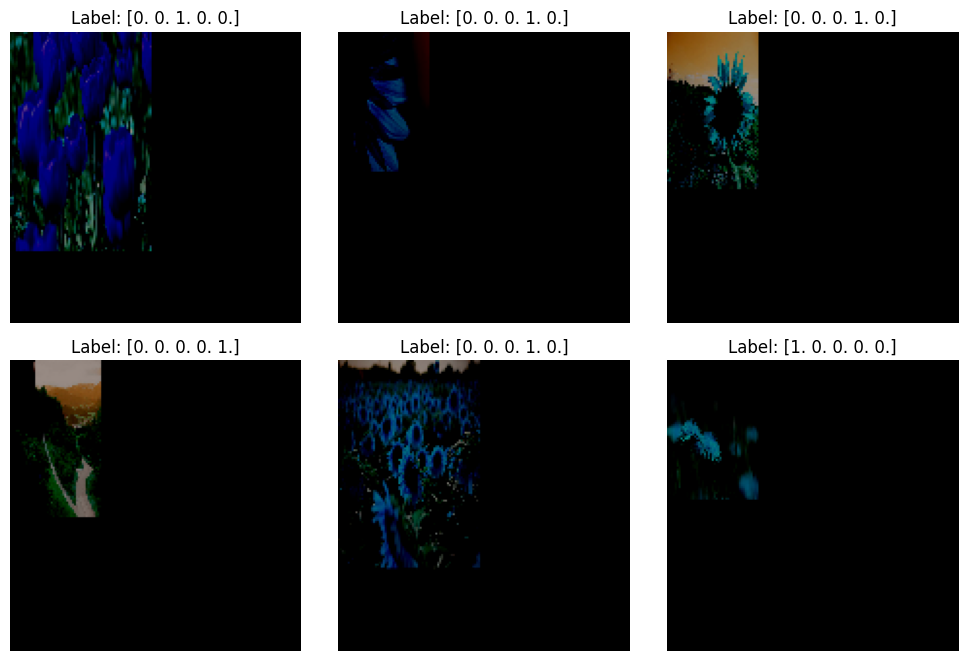

In [22]:

# images from the dataset
def display_sample_images(dataset, labels, num_images=9):
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)

        image = dataset[i].numpy()
        if image.max() <= 1.0:
            plt.imshow(image)
        else:
            plt.imshow(image / 255.0)

        plt.title(f"Label: {labels[i].numpy()}") #label
        plt.axis('off')  # Turn off axis

    plt.tight_layout()
    plt.show()

# Display
display_sample_images(train_ds, train_labels, num_images=6)


### Image Preprocessing

In [17]:
## check existing image size
train_ds[0].shape

TensorShape([150, 150, 3])

In [18]:
## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))
train_ds[0].shape


TensorShape([150, 150, 3])

In [5]:
## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

### Use Pretrained VGG16 Image Classification model

# **Load a pre-trained CNN model trained on a large dataset**

In [23]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [7]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
## We will not train base model i.e. Freeze Parameters in model's lower convolutional layers
base_model.trainable = False

In [9]:
## Preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

In [10]:
## model details
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

**Add custom classifier with two dense layers of trainable parameters to model**

In [11]:
#add our layers on top of this model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

**Train classifier layers on training data available for task**

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [13]:
history=model.fit(train_ds, train_labels, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 201ms/step - accuracy: 0.3664 - loss: 2.6227 - val_accuracy: 0.5039 - val_loss: 1.1766
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.5668 - loss: 1.0476 - val_accuracy: 0.5739 - val_loss: 1.0189
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.6657 - loss: 0.7604 - val_accuracy: 0.6070 - val_loss: 1.0792
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.7439 - loss: 0.6537 - val_accuracy: 0.6518 - val_loss: 0.9637
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.7923 - loss: 0.4969 - val_accuracy: 0.6634 - val_loss: 1.0461
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.8246 - loss: 0.3932 - val_accuracy: 0.6809 - val_loss: 1.0979
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.8506 - loss: 0.3549 - val_accuracy: 0.6751 - val_loss: 1.3123
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8727 - loss: 0.3170 - val_accuracy: 0.

In [14]:
los,accurac=model.evaluate(test_ds,test_labels)
print("Loss: ",los,"Accuracy: ", accurac)

35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step - accuracy: 0.9191 - loss: 0.2016
Loss:  0.1958971619606018 Accuracy:  0.9255222678184509


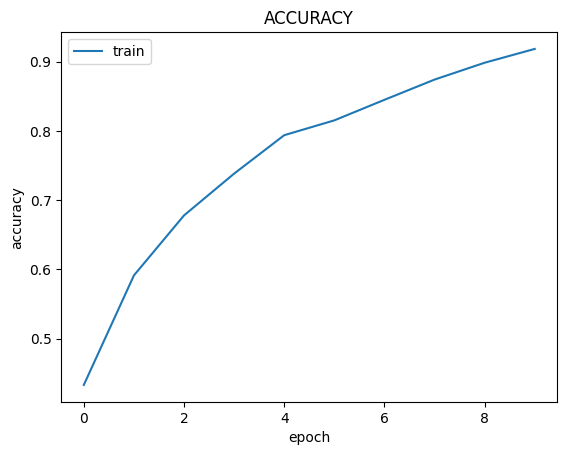

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()